Importing data

In [1]:
import pandas as pd

# path to the csv file
file_path = 'training_and_validation_data.csv'

# Read the CSV file
df = pd.read_csv(file_path)



Printing features name:

In [2]:
# Print the column names
for i, col_name in enumerate(df.columns):
    print(f"Column {i}: {col_name}")
    

Column 0: Number of analysed fibres
Column 1: Fibre content, millions/g of pulp
Column 2: Fiber_Length_Below_556
Column 3: Fiber_Length_Above_556
Column 4: [1000->]
Column 5: Mean fibre arithmetic length, µm
Column 6: Mean length-weighted fibre length, µm
Column 7: Fiber_width_Below_19
Column 8: Fiber_width_Above_19
Column 9: Mean fibre width, µm
Column 10: Mean fibre coarseness, mg/m
Column 11: Average kink number
Column 12: Average kink angle, °
Column 13: Kinked fibre content, %
Column 14: Mean fibre curl index, %
Column 15: MacroFibrillation index, %
Column 16: Broken fibre content, %
Column 17: Number of analysed fines
Column 18: Fines content, millions/g of pulp
Column 19: Fine content, % in area
Column 20: Fine content, % in length
Column 21: Fine content, % in length weighted in length
Column 22: Mean fine area, µm²
Column 23: Mean fine length, µm


Normalizing all data values based on Min/Max feature scaling: 



![image.png](attachment:39ee8fe3-383d-492f-b6f1-6ae343210b13.png)


In [3]:
import pandas as pd
# Normalize each feature in the dataframe
for column in df.columns:
    min_value = df[column].min()
    max_value = df[column].max()
    df[column] = (df[column] - min_value) / (max_value - min_value)


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Defining the input variables as a dataframe df and y the output variable (Tensile strength)
y = np.array([2.043, 4.672, 6.676, 6.97, 7.923, 5.768, 4.364]) 
X_df = df

# Specify the indices of your training and validation data (random)
train_indices = [0, 2, 3, 4, 6]  
validation_indices = [1, 5]  

# Select the rows for training and validation based on the specified indices
X_train = X_df.iloc[train_indices]
X_validation = X_df.iloc[validation_indices]
y_train = y[train_indices]
y_validation = y[validation_indices]

# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Predict on the validation and training sets
y_pred = random_forest_model.predict(X_validation)
y_pred_train = random_forest_model.predict(X_train)

# Calculate the performance metrics
r2 = r2_score(y_validation, y_pred)
rmse = np.sqrt(mean_squared_error(y_validation, y_pred))
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Calculate the Normalized RMSE for both validation and train data
nrmse = rmse / (y_validation.max() - y_validation.min())
nrmse_train = rmse_train / (y_train.max() - y_train.min())

print(f'Train Data - RMSE: {rmse_train}, NRMSE: {nrmse_train}')
print(f'Validation Data - RMSE: {rmse}, NRMSE: {nrmse}')


Train Data - RMSE: 0.7027497265171997, NRMSE: 0.11951525961176866
Validation Data - RMSE: 0.9970409281970362, NRMSE: 0.9097088760921862


Import test data that was normalized based on the training and validation datasets:

In [5]:
import pandas as pd

# Path to the csv file
file_path_test = 'normalized_test_data.csv'

# Read the csv file
df_test = pd.read_csv(file_path_test)

In [6]:
random_forest_model.predict(df_test)

array([4.02858, 6.64872])




Calculate the RMSE and NRMSE for test data:

In [7]:
import numpy as np

# True and predicted values test data for RF model
true = np.array([4.1784, 7.2949])
prediction = np.array([4.02858, 6.64872])

# Calculate RMSE
rmse = np.sqrt(np.mean((true - prediction) ** 2))

# Calculate NRMSE (normalized by the range of true values)
range_true = np.max(true) - np.min(true)
nrmse = rmse / range_true

print(f"RMSE test: {rmse:.4f}")
print(f"NRMSE test: {nrmse:.4f}")


RMSE test: 0.4690
NRMSE test: 0.1505


Feature importance:

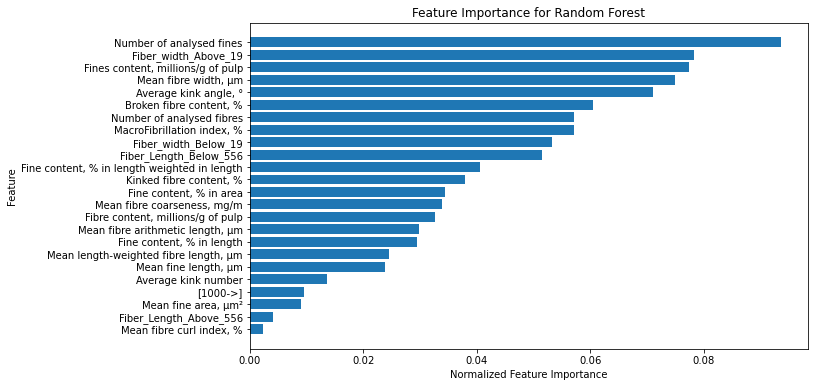

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importance = random_forest_model.feature_importances_

# Normalize feature importances to sum up to 1
feature_importance /= np.sum(feature_importance)


features = pd.Series(feature_importance, index=X_train.columns)

# Sort features by importance
features = features.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features.index[::-1], features[::-1], align='center')  # Reverse order for horizontal bar plot
plt.xlabel('Normalized Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest')
plt.show()


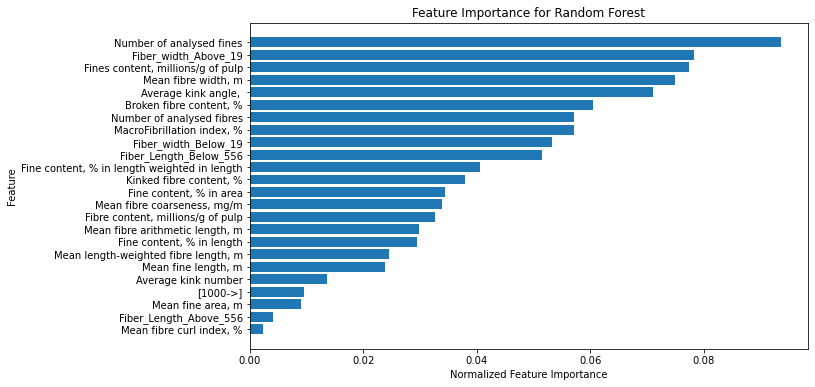

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check and clean feature names
X_train.columns = X_train.columns.str.encode('ascii', 'ignore').str.decode('ascii')

# Get feature importances
feature_importance = random_forest_model.feature_importances_

# Normalize feature importances to sum up to 1
feature_importance /= np.sum(feature_importance)

# Create feature importance series
features = pd.Series(feature_importance, index=X_train.columns)

# Sort features by importance
features = features.sort_values(ascending=False)

# Set font for compatibility
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features.index[::-1], features[::-1], align='center')  # Reverse order for horizontal bar plot
plt.xlabel('Normalized Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest')
plt.show()


Sensetivity analysis:

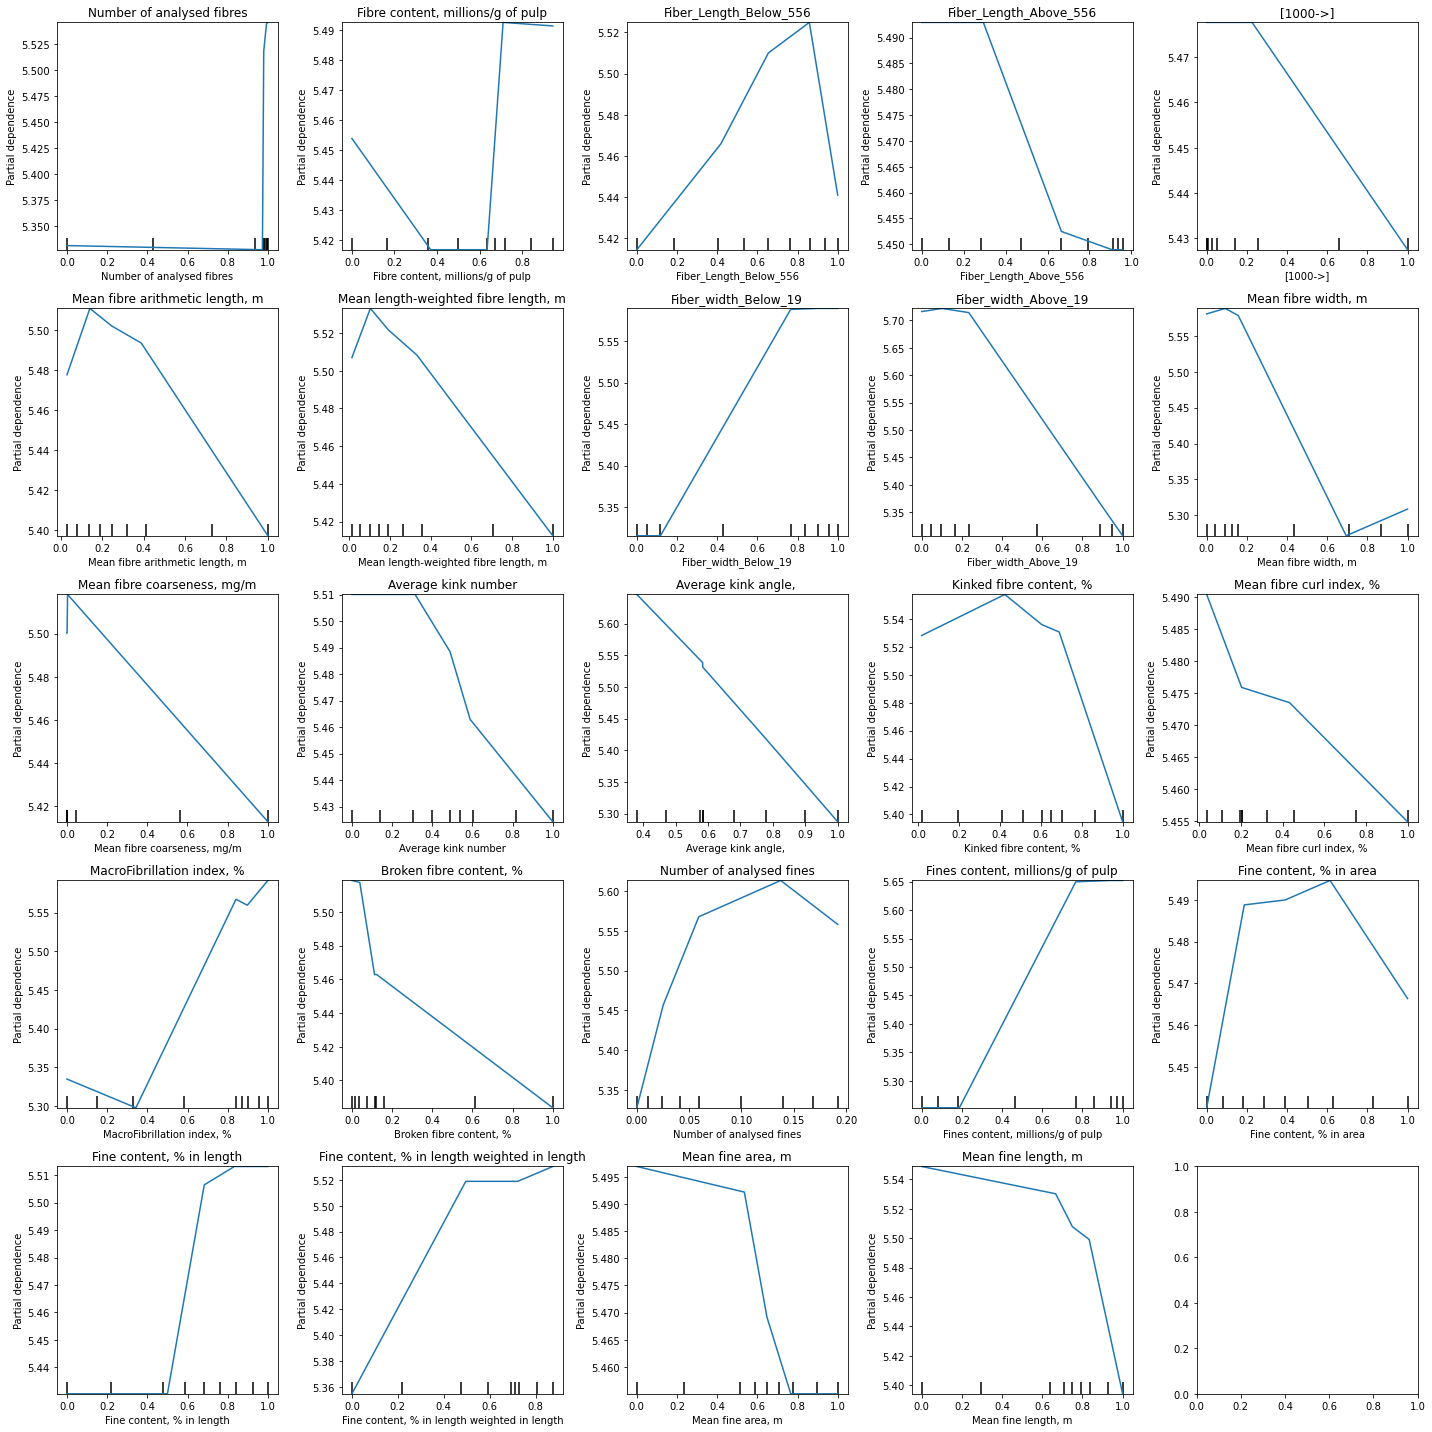

In [10]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import plot_partial_dependence
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


y = np.array([2.043, 4.672, 6.676, 6.97, 7.923, 5.768, 4.364])
X_df = df


train_indices = [0, 2, 3, 4, 6] 
validation_indices = [1, 5]  


X_train = X_df.iloc[train_indices]
X_validation = X_df.iloc[validation_indices]
y_train = y[train_indices]
y_validation = y[validation_indices]

# Initialize the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = random_forest_model.predict(X_validation)
y_pred_train = random_forest_model.predict(X_train)

# Plot Partial Dependence for all features
features = list(range(X_train.shape[1]))  
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(20, 20)) 
ax = ax.flatten()  

# # Set font for compatibility
# plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['axes.unicode_minus'] = False

X_train.columns = X_train.columns.str.encode('ascii', 'ignore').str.decode('ascii')


# Create PDP 
for i, feature in enumerate(features):
    if i < len(ax):  
    
        pdp_display = plot_partial_dependence(random_forest_model, X_train, features=[feature], ax=ax[i], grid_resolution=20)
        ax[i].set_title(X_train.columns[feature])  
        
     


fig.tight_layout()
plt.show()
